In [16]:
from sagemaker import get_execution_role
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
role = get_execution_role()
bucket = 'proj4-nba'
all_data = 'all_seasons.csv'
s3_route = 's3://{}/{}'.format(bucket, all_data)
data = pd.read_csv(s3_route)
data = data.iloc[:, 1:]

In [18]:
data.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


/tmp/ipykernel_9380/1097800185.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  LAC_season = LAC.groupby('season').sum()


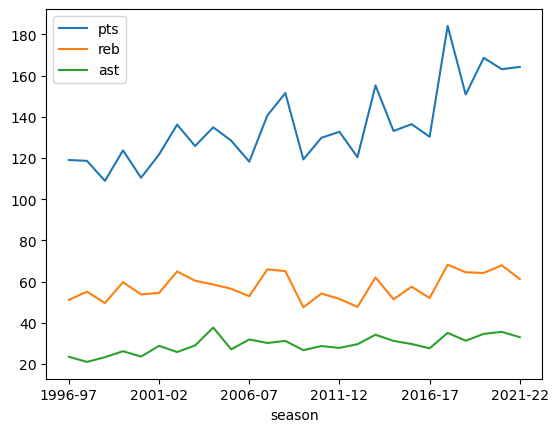

In [19]:
# LAC
LAC = data[data['team_abbreviation'] == 'LAC']
# plot the total points, rebounds, assists of different seasons
LAC_season = LAC.groupby('season').sum()
LAC_season = LAC_season.loc[:, ['pts', 'reb', 'ast']]
LAC_season.plot()
plt.show()

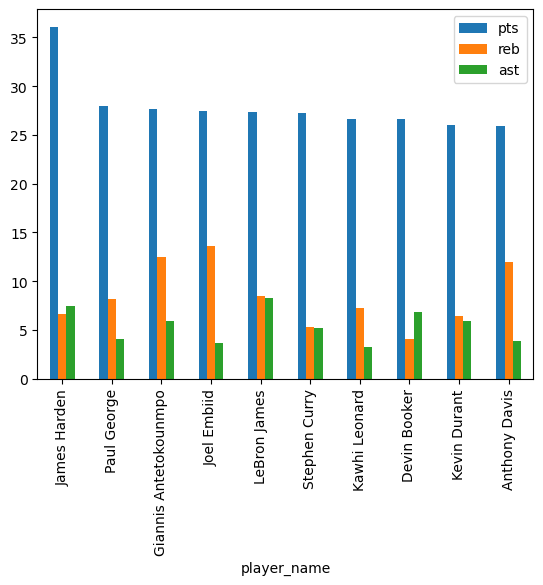

In [20]:
# season 2018-19
season_2018_19 = data[data['season'] == '2018-19']
# use bar chart to show the top 10 players in points, rebounds, assists
season_2018_19 = season_2018_19.sort_values(by = 'pts', ascending = False)
season_2018_19 = season_2018_19.iloc[:10, :]
season_2018_19 = season_2018_19.loc[:, ['player_name', 'pts', 'reb', 'ast']]
season_2018_19 = season_2018_19.set_index('player_name')
season_2018_19.plot.bar()
plt.show()

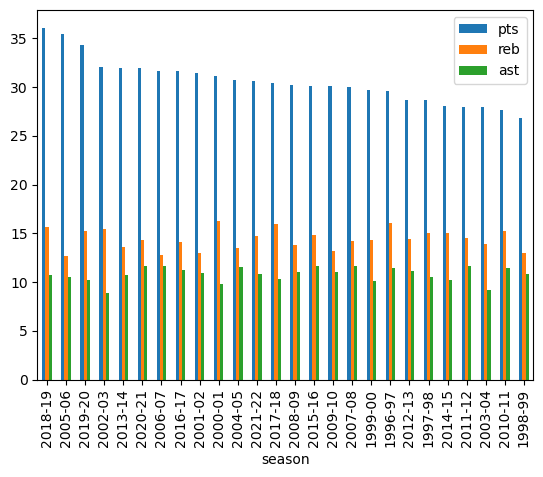

In [21]:
# use bar chart to show the max of points, rebounds, assists of different seasons
season_max = data.groupby('season').max()
season_max = season_max.loc[:, ['pts', 'reb', 'ast']]
season_max = season_max.sort_values(by = 'pts', ascending = False)
season_max.plot.bar()
plt.show()